In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib.colors as colors

In [5]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [2]:
phys_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2023, 2023)).mean(dim='time')
phys_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2022, 2022)).mean(dim='time')
phys_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2021, 2021)).mean(dim='time')
phys_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2020, 2020)).mean(dim='time')
phys_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2019, 2019)).mean(dim='time')

In [3]:
# fw_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023)).mean(dim='time')
# fw_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022)).mean(dim='time')
# fw_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021)).mean(dim='time')
# fw_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020)).mean(dim='time')
# fw_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019)).mean(dim='time')

In [12]:
import salishsea_tools.river_202108 as rivers

def river_box(w_shed, r_call, box_side):  #TODO: change either box location or change box to circle
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 897-box_side*2
        river_range[1] = 897

    if (398 - river_range[3] < 0):
        river_range[2] = 398-box_side*2
        river_range[3] = 398

    return river_range

In [13]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [35]:
def plot_point(w_shed, r_call, ax):
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    ax.plot(river_idx[1], river_idx[0], 'ro', alpha=0.5)

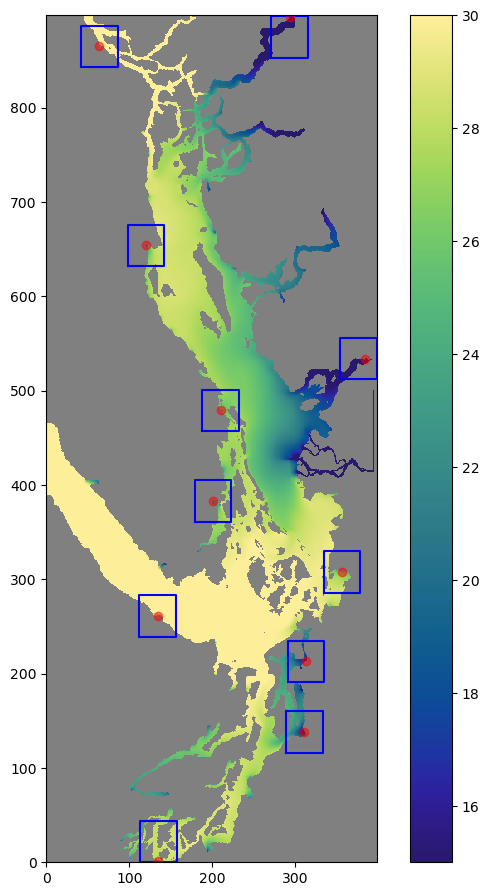

In [36]:
cmap = cm.haline
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (8.5, 11), sharex=True, sharey=True)

dep_idx = 0
salinity = np.ma.masked_array(phys_2023_mon.vosaline[dep_idx], mask=tmask[0])
colours = ax.pcolormesh(salinity, vmin=15, vmax=30, cmap=cmap)
# dtime = pd.to_datetime(avgdepth_2019_mon['time'].values[dep_idx])
# ax.set_title('{}'.format(dtime.month_name()))
viz_tools.set_aspect(ax);

box_size = 22
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
plot_box(ax, Nooksack, 'b')
plot_point('fraser', 'Nooksack', ax)

Skagit = river_box('skagit', 'Skagit1', box_size)
plot_box(ax, Skagit, 'b')
plot_point('skagit', 'Skagit1', ax)

Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
plot_box(ax, Snohomish, 'b')
plot_point('skagit', 'SnohomishAllenQuilceda', ax)

Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
plot_box(ax, Nisqually, 'b')
plot_point('puget', 'NisquallyMcAllister', ax)

Elwha = river_box('jdf', 'Elwha', box_size)
plot_box(ax, Elwha, 'b')
plot_point('jdf', 'Elwha', ax)

Cowichan = river_box('evi_s', 'Cowichan1', box_size)
plot_box(ax, Cowichan, 'b')
plot_point('evi_s', 'Cowichan1', ax)

Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
plot_box(ax, Nanaimo, 'b')
plot_point('evi_s', 'Nanaimo1', ax)

Puntledge = river_box('evi_s', 'Puntledge', box_size)
plot_box(ax, Puntledge, 'b')
plot_point('evi_s', 'Puntledge', ax)

Salmon = river_box('evi_n', 'SalmonSayward', box_size)
plot_box(ax, Salmon, 'b')
plot_point('evi_n', 'SalmonSayward', ax)

Homathko = river_box('bute', 'Homathko', box_size)
plot_box(ax, Homathko, 'b')
plot_point('bute', 'Homathko', ax)

Squamish = river_box('howe', 'Squamish', box_size)
plot_box(ax, Squamish, 'b')
plot_point('howe', 'Squamish', ax)

cb = fig.colorbar(colours, ax=ax, label=r''.format('salinity'))

In [42]:
phys_2023_mon.depth[21]

<xarray.DataArray 'depth' ()>
array(28.229916, dtype=float32)
Coordinates:
    depth    float32 28.23
Attributes:
    standard_name:  sea_floor_depth
    long_name:      Sea Floor Depth
    units:          metres
    positive:       down

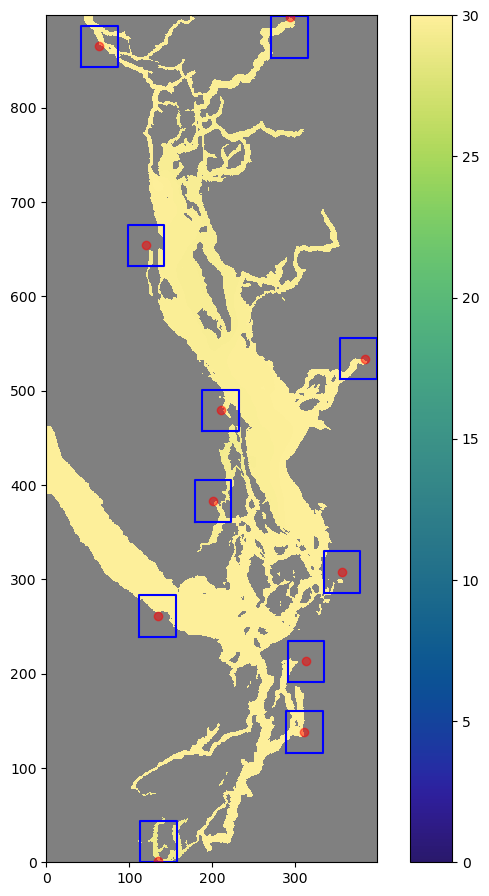

In [43]:
cmap = cm.haline
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (8.5, 11), sharex=True, sharey=True)

dep_idx = 21
salinity = np.ma.masked_array(phys_2023_mon.vosaline[dep_idx], mask=tmask[dep_idx])
colours = ax.pcolormesh(salinity, vmin=0, vmax=30, cmap=cmap)
# dtime = pd.to_datetime(avgdepth_2019_mon['time'].values[dep_idx])
# ax.set_title('{}'.format(dtime.month_name()))
viz_tools.set_aspect(ax);

box_size = 22
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
plot_box(ax, Nooksack, 'b')
plot_point('fraser', 'Nooksack', ax)

Skagit = river_box('skagit', 'Skagit1', box_size)
plot_box(ax, Skagit, 'b')
plot_point('skagit', 'Skagit1', ax)

Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
plot_box(ax, Snohomish, 'b')
plot_point('skagit', 'SnohomishAllenQuilceda', ax)

Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
plot_box(ax, Nisqually, 'b')
plot_point('puget', 'NisquallyMcAllister', ax)

Elwha = river_box('jdf', 'Elwha', box_size)
plot_box(ax, Elwha, 'b')
plot_point('jdf', 'Elwha', ax)

Cowichan = river_box('evi_s', 'Cowichan1', box_size)
plot_box(ax, Cowichan, 'b')
plot_point('evi_s', 'Cowichan1', ax)

Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
plot_box(ax, Nanaimo, 'b')
plot_point('evi_s', 'Nanaimo1', ax)

Puntledge = river_box('evi_s', 'Puntledge', box_size)
plot_box(ax, Puntledge, 'b')
plot_point('evi_s', 'Puntledge', ax)

Salmon = river_box('evi_n', 'SalmonSayward', box_size)
plot_box(ax, Salmon, 'b')
plot_point('evi_n', 'SalmonSayward', ax)

Homathko = river_box('bute', 'Homathko', box_size)
plot_box(ax, Homathko, 'b')
plot_point('bute', 'Homathko', ax)

Squamish = river_box('howe', 'Squamish', box_size)
plot_box(ax, Squamish, 'b')
plot_point('howe', 'Squamish', ax)

cb = fig.colorbar(colours, ax=ax, label=r''.format('salinity'))